In [ ]:
#!conda install -c conda-forge entropy -y

In [5]:
#!conda install -c conda-forge librosa -y

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt3
from numpy.lib.stride_tricks import as_strided as ast
from entropy import *
from librosa.feature import *

B:\Anaconda3\envs\abv\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


# Feature extraction functions

In [7]:
# https://datascience.stackexchange.com/questions/21934/feature-extraction-of-accelerometer-data-for-machine-learning

# spectral_entropy
# https://raphaelvallat.com/entropy/build/html/generated/entropy.spectral_entropy.html

# spectral centroid
# https://librosa.org/librosa/generated/librosa.feature.spectral_centroid.html

# pywavelet
# https://pywavelets.readthedocs.io/en/latest/

# scipy.signal
# https://docs.scipy.org/doc/scipy/reference/signal.html

# window functions and standard statistic functions
# https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#window-functions

In [8]:
def make_cols(cols:list, ftr:str ):
    for i, c in enumerate(cols):
        cols[i] = c+f'_{ftr}'
    return cols

In [9]:
def extract_feature(df, fnc, drop_cols):
    temp = df.copy()
    temp = temp.drop(columns=drop_cols)
    window = temp.rolling('60000ms').apply(fnc)
    return window

In [12]:
data_path = os.path.join('..','data','interim','no_gaps')
for ds in ['HV0618_4.csv']: #os.listdir(data_path):
#     ds = 'BK7610_1.csv' 

    print(ds)
    df = pd.read_csv(os.path.join(data_path,ds))
    drop_cols = ['ir_voltage','temperature']
    df = df.drop(columns=drop_cols)
    if df.shape[0] < 60:
        continue
    df.head
    
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.set_index('timestamp') 
    ### Time window using pandas Rolling, we can use with different functions for the windows (Timebased)
    mean_window = df.rolling('60000ms').mean()
    ndf = mean_window.copy()
    ncols = make_cols(list(ndf.columns),'mean')
    ndf.columns = ncols
    
    fncs = {'spectral_centroid': (lambda x: spectral_centroid(x.to_numpy(copy=True), sr=40, hop_length=x.shape[0]+1), ['tac_clean', 'tac_raw']),
#             'spectral_entropy': (lambda x: spectral_entropy(x, 40, method='fft', normalize=True), ['tac_clean', 'tac_raw']),
            'min': (lambda x: x.min(),[]),
            'max': (lambda x: x.max(),[]),
            'median': (lambda x: x.max(),[]),
            'quantiles': (lambda x: x.quantile(),[]),
            'std': (lambda x: x.std(ddof=0),[])
           }
    # Go through the list of functions and add results to the big dataframe
    for name, (fnc, drop_cols) in fncs.items():
        print(name)
        window = extract_feature(df, fnc, drop_cols)
        ncols = make_cols(list(window.columns), name)
        window.columns = ncols
        # add it to the big dataframe
        ndf = ndf.merge(window, left_index =True, right_index=True)
print(ndf.isna().sum())
print(f'shape: {ndf.shape}')
        
        
#     print(f'{df.head} \n {ndf.head}')       
#     print(f'{window.shape} \n {mean_window.shape}')
          
    

HV0618_4.csv
spectral_centroid
min
max
median
quantiles
std
x_mean                 0
y_mean                 0
z_mean                 0
tac_clean_mean         0
tac_raw_mean           0
x_spectral_centroid    0
y_spectral_centroid    0
z_spectral_centroid    0
x_min                  0
y_min                  0
z_min                  0
tac_clean_min          0
tac_raw_min            0
x_max                  0
y_max                  0
z_max                  0
tac_clean_max          0
tac_raw_max            0
x_median               0
y_median               0
z_median               0
tac_clean_median       0
tac_raw_median         0
x_quantiles            0
y_quantiles            0
z_quantiles            0
tac_clean_quantiles    0
tac_raw_quantiles      0
x_std                  0
y_std                  0
z_std                  0
tac_clean_std          0
tac_raw_std            0
dtype: int64
shape: (754, 33)


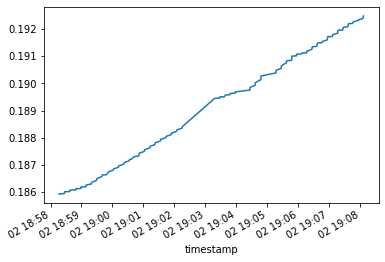

In [11]:
ndf.tac_clean_mean.plot()